In [64]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


In [10]:
diab = pd.read_csv(r"C:\Users\muzam\OneDrive\Desktop\PROJECTS\healthcare-risk-modelling\data\diabetes.csv")

In [11]:
diab_df = pd.DataFrame(diab)
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diab_df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

It turns out that 'DiabetesPedigreeFunction' was a mirage, this may be due to a different version of the dataset installed, or may have been removed earlier.

Either way, we may proceed with training the model now.

### 3. Model Training & Baseline Evaluation

#### 3.1 Train/test split

In [13]:
X = diab_df.drop("Outcome", axis=1)
y = diab_df["Outcome"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1) 
                                #stratify: prevents bias, fairer performance
                                #random_state: ensures model results are reproducible for more testing/collab

#### 3.2 Baseline Model

As we are predicting Outcome (whether likely to be diabetic or not), it has a binary output (1 or 0)

This means it is discrete and we will use a classification model

In [48]:
clf = RandomForestClassifier() # Excellent model with not much tuning
clf_xgb= XGBClassifier(
    learning_rate=0.1, 
    max_depth=6, 
    eval_metric='logloss'
)

Rule of thumb:

* Classification = Predict labels or categories (e.g., 0/1, spam/not spam, disease/no disease)

* Regression = Predict a number (e.g., price, blood sugar level, cost, lifespan)

In [49]:
clf.fit(X_train, y_train)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### 3.3 Evaluate models

In [50]:
y_pred = clf.predict(X_test)
y_pred_xgb = clf_xgb.predict(X_test)

##### Evauating RandomForestClassifier

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n")
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy: 0.7316017316017316


Confusion matrix: 
 [[128  22]
 [ 40  41]]


Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



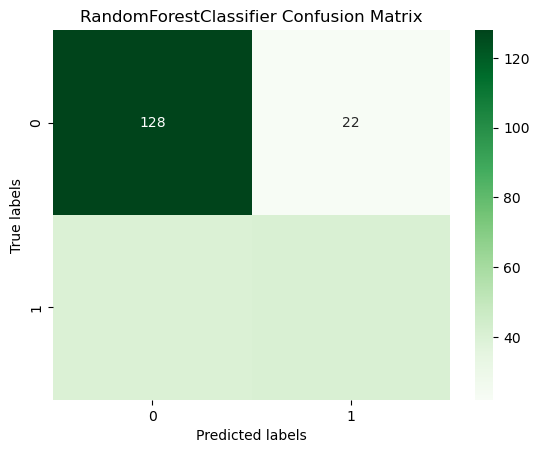

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Greens")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

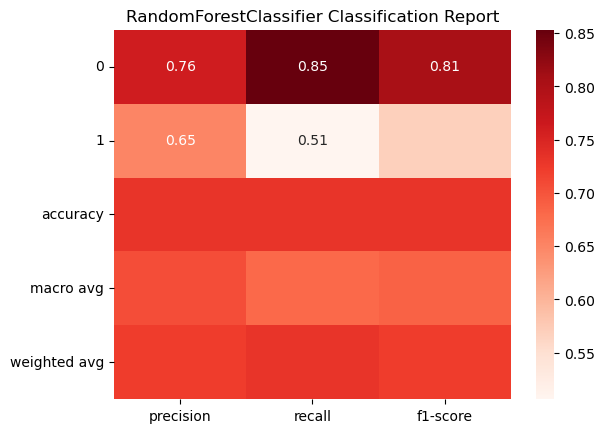

In [83]:
cf = classification_report(y_test, y_pred, output_dict=True)
dia_df = pd.DataFrame(cf).transpose()
sns.heatmap(
    dia_df[['precision', 'recall', 'f1-score']], 
    annot=True, 
    cmap="Reds"
)
plt.title("RandomForestClassifier Classification Report");

In [96]:
# Cross validation
a_scores = cross_val_score(clf, X, y, cv=6, scoring="accuracy")
p_scores = cross_val_score(clf, X, y, cv=6, scoring="precision")
r_scores = cross_val_score(clf, X, y, cv=6, scoring="recall")

In [97]:
print("CV Accuracy: %0.3f ± %0.3f" % (a_scores.mean(), a_scores.std()))
print("CV Precision: %0.3f ± %0.3f" % (p_scores.mean(), p_scores.std()))
print("CV Recall: %0.3f ± %0.3f" % (r_scores.mean(), r_scores.std()))

CV Accuracy: 0.759 ± 0.034
CV Precision: 0.703 ± 0.081
CV Recall: 0.605 ± 0.073


##### Evaluating XGBClassifier

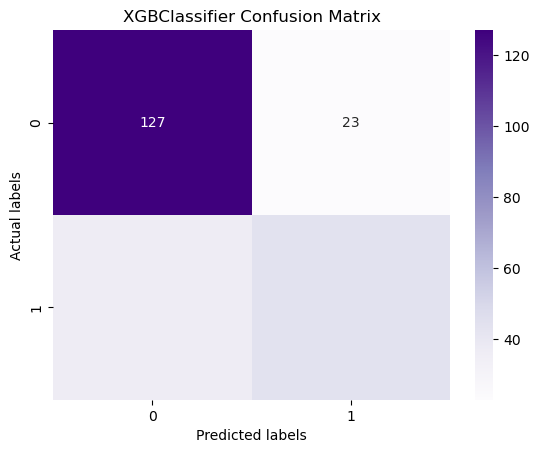

In [81]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples"
)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("XGBClassifier Confusion Matrix")
plt.show()

In [101]:
print("Accuracy score: ", accuracy_score(y_test, y_pred_xgb))
print("\n")
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_xgb))
print("\n")
print("Classification report: \n", classification_report(y_test, y_pred_xgb))

Accuracy score:  0.7402597402597403


Confusion matrix: 
 [[127  23]
 [ 37  44]]


Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.54      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



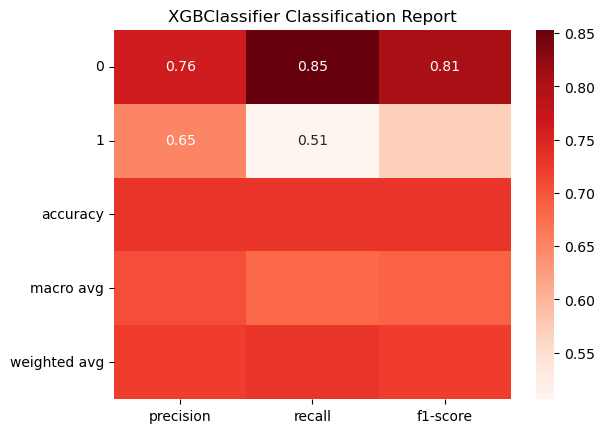

In [87]:
cf = classification_report(y_test, y_pred_xgb, output_dict=True)
sns.heatmap(
    dia_df[["precision", "recall", "f1-score"]],
    annot=True,
    cmap="Reds"
)
plt.title("XGBClassifier Classification Report");

In [98]:
a_scores = cross_val_score(clf_xgb, X, y, cv=6, scoring="accuracy")
p_scores = cross_val_score(clf_xgb, X, y, cv=6, scoring="precision")
r_scores = cross_val_score(clf_xgb, X, y, cv=6, scoring="recall")

In [100]:
print("XG Accuracy: %0.3f ± %0.3f" % (a_scores.mean(), a_scores.std()))
print("XG Precision: %0.3f ± %0.3f" % (p_scores.mean(), p_scores.std()))
print("XG Recall: %0.3f ± %0.3f" % (r_scores.mean(), r_scores.std()))

XG Accuracy: 0.749 ± 0.036
XG Precision: 0.655 ± 0.052
XG Recall: 0.597 ± 0.091


#### Conclusion: 

RandomForestClassifier() yields superior results due to lower variability and higher accuracy, precision, recall & f-1 scores.